In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Create the .kaggle directory and copy kaggle.json
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Machine_Learning_Models_Udemy/Deep_Learning_Campus_X/CNN/CNN_Project/kaggle.json ~/.kaggle/

# Set file permissions
!chmod 600 ~/.kaggle/kaggle.json

# Install kaggle if necessary
!pip install kaggle


In [ ]:
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset
License(s): other
100% 747M/750M [00:19<00:00, 47.1MB/s]
100% 750M/750M [00:19<00:00, 41.1MB/s]


In [ ]:
import zipfile
unzip_file= zipfile.ZipFile('/content/stanford-dogs-dataset.zip', 'r')
unzip_file.extractall('/content') # here can change path also , in order to use the data
# unzip_file.extractall('/content/drive/MyDrive/Machine_Learning_Models_Udemy/Deep_Learning_Campus_X/CNN/CNN_Project/Dog_Breed_Classification/') # here can change path also , in order to use the data
unzip_file.close()



In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET

def extract_breed_from_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    # Extract the breed name from the <name> tag under <object>
    image_file_name = root.find('filename').text
    return image_file_name

# Paths to annotations and images
annotation_dir = '/content/annotations/Annotation/'

# Path to the folder containing the dog breed images
images_dir = '/content/images/Images/'

# Destination folders for train and test sets
train_dir = '/content/dataset/train/'
test_dir = '/content/dataset/test/'


# Get all breed folders (subdirectories) in the annotations directory
breed_folders = os.listdir(annotation_dir)

# Create destination directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)



# Prepare a list to hold image file paths and their corresponding labels (breeds)
image_paths = []
labels = []

for breed_folder in breed_folders:
    # Paths for breed-specific folders in annotations and images
    annotation_breed_folder = os.path.join(annotation_dir, breed_folder)

    # print("annotation breed directory : ",annotation_breed_folder)

    image_breed_folder = os.path.join(images_dir, breed_folder)

    # print("image breed directory : ",image_breed_folder)

    breed_name = breed_folder.split('-')[-1]

    # List all annotation files for this breed
    annotation_files = os.listdir(annotation_breed_folder)

    # Map each annotation to its corresponding image
    for annotation_file in annotation_files:

        annotation_file_path = os.path.join(annotation_breed_folder, annotation_file)
        # image_file = annotation_file.replace('.xml', '')
        image_base_name = annotation_file.replace('.xml', '')
        # image_path = os.path.join(image_breed_folder, image_file)
        image_path = None

        # Look for a matching image file with any extension in the image folder
        image_files = os.listdir(image_breed_folder)

        # print("annotation file  path : ",annotation_file_path)
        # print("image path : ",image_path)
        # Loop through the image files to find the one with the matching base name
        for img_file in image_files:
            if img_file.startswith(image_base_name):
                image_path = os.path.join(image_breed_folder, img_file)
                break

         # Print the annotation and image paths for debugging
        # print("Annotation file path:", annotation_file_path)
        # print("Image path:", image_path)
        # annotation_file_name = extract_breed_from_xml(annotation_file_path)
        # print("Extracted annotation name:", annotation_file_name)
        # breed_name=breed_folder.join(annotation_file_name)

        if image_path and  os.path.exists(image_path):
            # print("Reachimg here")
            image_paths.append(image_path)
            labels.append(breed_name)  # Use the folder name (breed) as the label

        else:
            print("Image not found:", image_path)

path_4='/content/images/Images/n02102480-Sussex_spaniel/n02102480_2192.jpg'



# # Iterate over each breed folder and create train-test splits
# for breed in os.listdir(images_dir):
#     breed_dir = os.path.join(images_dir, breed)
#     # print("breed directory : ",breed_dir)
#     if os.path.isdir(breed_dir):
#         images = os.listdir(breed_dir)
#         train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

#         # Create breed-specific directories in train and test folders
#         train_breed_dir = os.path.join(train_dir, breed)
#         test_breed_dir = os.path.join(test_dir, breed)
#         # print("Train directory : ",train_breed_dir)
#         # print("Test directory : ",train_breed_dir)


#         os.makedirs(train_breed_dir, exist_ok=True)
#         os.makedirs(test_breed_dir, exist_ok=True)

#         # Copy images to the respective folders
#         for img in train_images:
#             shutil.copy(os.path.join(breed_dir, img), train_breed_dir)
#         for img in test_images:
#             shutil.copy(os.path.join(breed_dir, img), test_breed_dir)

In [ ]:
print(labels)
print(len(labels))

['whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet', 'whippet'

In [ ]:
def unique(list1):

    # initialize a null list
    unique_list = []

    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list

    return unique_list

In [ ]:
print(len(unique(labels)))
print(unique(labels))

119
['whippet', 'Tibetan_mastiff', 'bull_mastiff', 'standard_schnauzer', 'Pomeranian', 'komondor', 'coated_wheaten_terrier', 'Great_Pyrenees', 'malamute', 'tan_coonhound', 'English_springer', 'bluetick', 'basenji', 'otterhound', 'Doberman', 'haired_fox_terrier', 'Pembroke', 'Walker_hound', 'Gordon_setter', 'Bedlington_terrier', 'Norfolk_terrier', 'West_Highland_white_terrier', 'Blenheim_spaniel', 'miniature_pinscher', 'Chesapeake_Bay_retriever', 'Boston_bull', 'Samoyed', 'miniature_schnauzer', 'Irish_terrier', 'Rhodesian_ridgeback', 'Afghan_hound', 'Kerry_blue_terrier', 'Great_Dane', 'cocker_spaniel', 'Bernese_mountain_dog', 'Norwegian_elkhound', 'Irish_wolfhound', 'Lhasa', 'Cardigan', 'Australian_terrier', 'Weimaraner', 'Bouvier_des_Flandres', 'Appenzeller', 'redbone', 'African_hunting_dog', 'Saint_Bernard', 'basset', 'haired_pointer', 'Eskimo_dog', 'Sealyham_terrier', 'Lakeland_terrier', 'Airedale', 'Leonberg', 'affenpinscher', 'Old_English_sheepdog', 'papillon', 'vizsla', 'Mexican_h

In [ ]:
print(image_paths)
print(len(image_paths))

['/content/images/Images/n02091134-whippet/n02091134_4273.jpg', '/content/images/Images/n02091134-whippet/n02091134_16420.jpg', '/content/images/Images/n02091134-whippet/n02091134_524.jpg', '/content/images/Images/n02091134-whippet/n02091134_11775.jpg', '/content/images/Images/n02091134-whippet/n02091134_7606.jpg', '/content/images/Images/n02091134-whippet/n02091134_16541.jpg', '/content/images/Images/n02091134-whippet/n02091134_732.jpg', '/content/images/Images/n02091134-whippet/n02091134_12732.jpg', '/content/images/Images/n02091134-whippet/n02091134_13957.jpg', '/content/images/Images/n02091134-whippet/n02091134_19124.jpg', '/content/images/Images/n02091134-whippet/n02091134_12537.jpg', '/content/images/Images/n02091134-whippet/n02091134_11956.jpg', '/content/images/Images/n02091134-whippet/n02091134_4149.jpg', '/content/images/Images/n02091134-whippet/n02091134_15210.jpg', '/content/images/Images/n02091134-whippet/n02091134_15784.jpg', '/content/images/Images/n02091134-whippet/n020

In [ ]:
# Split the data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, stratify=labels)


# Move the images to the corresponding train/test folders
for img, label in zip(train_images, train_labels):
    breed_train_folder = os.path.join(train_dir, label)
    os.makedirs(breed_train_folder, exist_ok=True)
    shutil.copy(img, breed_train_folder)

for img, label in zip(test_images, test_labels):
    breed_test_folder = os.path.join(test_dir, label)
    os.makedirs(breed_test_folder, exist_ok=True)
    shutil.copy(img, breed_test_folder)

print("Train and test datasets created successfully!")

Train and test datasets created successfully!


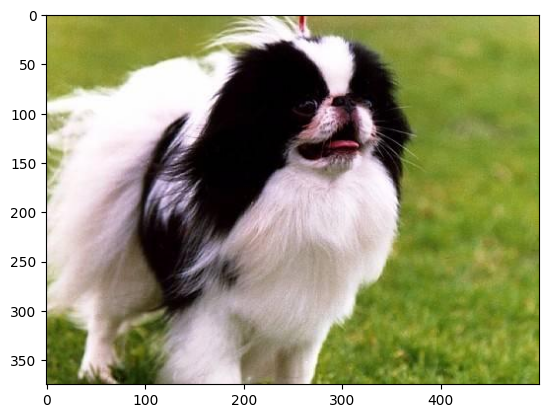

In [ ]:
# import cv2
# import matplotlib.pyplot as plt
# path_3='/content/dataset/train/n02085782-Japanese_spaniel/n02085782_1039.jpg'

# test_img_dog=cv2.imread(path_3)

# test_img_dog = cv2.cvtColor(test_img_dog, cv2.COLOR_BGR2RGB)

# # Display the image
# plt.imshow(test_img_dog)
# plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D,BatchNormalization
from tensorflow.keras.utils import to_categorical, model_to_dot, plot_model
from tensorflow.keras import  models

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,VGG19
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

import re
from bs4 import BeautifulSoup

import warnings

warnings.filterwarnings('ignore')

path='/content/drive/MyDrive/Machine_Learning_Models_Udemy/Deep_Learning_Campus_X/CNN/CNN_Project/Dog_Breed_Classification'

path2='/content/annotations/Annotation/n02085620-Chihuahua/n02085620_10074 ','/content/annotations/Annotation/n02085782-Japanese_spaniel' '/content/annotations/Annotation/n02085782-Japanese_spaniel/n02085782_1039'


learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=0)
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator for test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and test datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(
        224, 224),
    color_mode= 'rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle= True,
    seed= 1337
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode= 'rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle= True,
    seed= 1337
)



# Dynamically get the number of classes from train_generator
num_classes = train_generator.num_classes
print(f"Number of classes: {num_classes}")






Found 16215 images belonging to 119 classes.
Found 4103 images belonging to 119 classes.
Number of classes: 119


In [ ]:
# Dynamically get the number of classes from train_generator
num_classes = train_generator.num_classes
print(f"Number of classes: {num_classes}")

num_classes_2 = len(train_generator.class_indices)
print(f"Number of classes 2: {num_classes_2}")
train_labels = train_generator.classes
print(f"Train Labels  : {train_labels}")
train_labels = to_categorical(train_labels, num_classes=num_classes)
valid_labels = test_generator.classes
print(f"Test Labels  : {valid_labels}")
valid_labels = to_categorical(valid_labels, num_classes=num_classes)
nb_train_samples = len(train_generator.filenames)
nb_valid_samples = len(test_generator.filenames)


print("nb_train_samples : ",nb_train_samples)
print("nb_valid_samples : ",nb_valid_samples)

Number of classes: 119
Number of classes 2: 119
Train Labels  : [  0   0   0 ... 118 118 118]
Test Labels  : [  0   0   0 ... 118 118 118]
nb_train_samples :  16215
nb_valid_samples :  4103


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [ ]:

# Load pre-trained VGG16 model and fine-tune it
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

set_trainable = False

# for layer in base_model.layers:
#   if layer.name == 'block5_conv1':
#     set_trainable = True
#   if set_trainable:
#     layer.trainable = True
#   else:
#     layer.trainable = False

# for layer in base_model.layers:
#   print(layer.name,layer.trainable)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
base_model_output_shape = base_model.output.shape
print(f"Output shape of base model: {base_model_output_shape}")


Output shape of base model: (None, 7, 7, 512)


In [ ]:
model = Sequential()
# Add pre-trained base model
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
# model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))  # Automatically use the number of classes
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [ ]:
# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
138/508 ━━━━━━━━━━━━━━━━━━━━ 2:39:39 26s/step - accuracy: 0.0148 - loss: 4.8459

In [ ]:
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

